In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data=pd.read_csv("spam.csv",encoding="latin-1");

# dropping extra columns and assigning names to column
data=data.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
data.columns=["label","text"]
data.head(n=15)



,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label    5572 non-null object
text     5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB


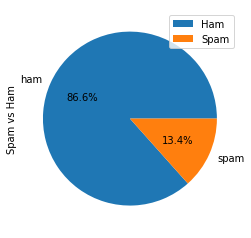

In [16]:
data["label"].value_counts().plot(kind = 'pie',autopct="%1.1f%%")
plt.ylabel("Spam vs Ham")
plt.legend(["Ham", "Spam"])
plt.show()

In [17]:
#Making a list of spam and ham words

import nltk 
# nltk.download("all")
from nltk.corpus import stopwords
import string
from nltk.tokenize import word_tokenize

spam_messages =data[data["label"] == "spam"]["text"]
ham_messages = data[data["label"] == "ham"]["text"]

spam_words=[]
ham_words=[]

def spamMessage(msg):
    global spam_words
    for words in word_tokenize(msg):
        if( words not in stopwords.words("english") and words.isalpha()):
           spam_words.append(words.lower())
        
def hamMessage(msg):
    global ham_words
    for words in word_tokenize(msg):
        if(words  not in stopwords.words("english") and words.isalpha()):
            ham_words.append(words.lower())
            
spam_messages.apply(spamMessage)
ham_messages.apply(hamMessage)



0       None
1       None
3       None
4       None
6       None
7       None
10      None
13      None
14      None
16      None
17      None
18      None
20      None
21      None
22      None
23      None
24      None
25      None
26      None
27      None
28      None
29      None
30      None
31      None
32      None
33      None
35      None
36      None
37      None
38      None
        ... 
5538    None
5539    None
5541    None
5542    None
5543    None
5544    None
5545    None
5546    None
5548    None
5549    None
5550    None
5551    None
5552    None
5553    None
5554    None
5555    None
5556    None
5557    None
5558    None
5559    None
5560    None
5561    None
5562    None
5563    None
5564    None
5565    None
5568    None
5569    None
5570    None
5571    None
Name: text, Length: 4825, dtype: object

In [18]:
# finding the number of spam words repeated
spam_words=np.array(spam_words)
pd.Series(spam_words).value_counts().head()

call    346
free    217
txt     156
u       144
ur      144
dtype: int64

In [19]:
# finding the number of ham words repeated
ham_words=np.array(ham_words)
pd.Series(ham_words).value_counts().head()

i      1910
u       974
gt      318
lt      316
get     301
dtype: int64

In [50]:
# message lengths
data["messageLength"] = data["text"].apply(len)

C:\Users\ahmed\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


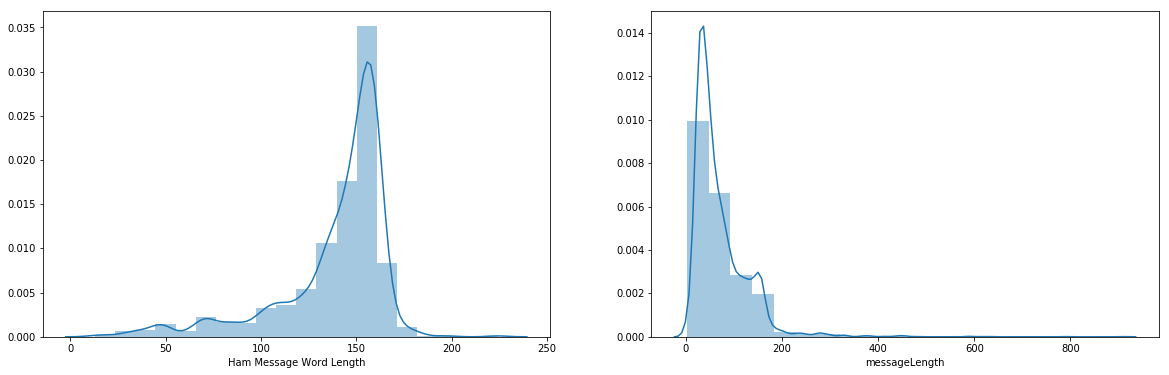

In [51]:
f, ax = plt.subplots(1, 2, figsize = (20, 6))

sns.distplot(data[data["label"] == "spam"]["messageLength"], bins = 20, ax = ax[0])
ax[0].set_xlabel("Spam Message Word Length")

sns.distplot(data[data["label"] == "ham"]["messageLength"], bins = 20, ax = ax[1])
ax[0].set_xlabel("Ham Message Word Length")

plt.show()

In [20]:
# Cleaning data
from nltk.stem import SnowballStemmer
stemmer=SnowballStemmer("english")
def cleanText(message):
    message = message.translate(str.maketrans('', '', string.punctuation))
    words = [stemmer.stem(word) for word in message.split() if word.lower() not in stopwords.words("english")]
    return " ".join(words)


data["text"] = data["text"].apply(cleanText)
data.head(n = 10)    

,label,text
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri 2 wkli comp win fa cup final tkts 2...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah dont think goe usf live around though
5,spam,freemsg hey darl 3 week word back id like fun ...
6,ham,even brother like speak treat like aid patent
7,ham,per request mell mell oru minnaminungint nurun...
8,spam,winner valu network custom select receivea å£9...
9,spam,mobil 11 month u r entitl updat latest colour ...


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(data["text"])
print(features.shape)

(5572, 7903)


In [22]:
def encodeCategory(cat):
    if cat == "spam":
        return 1
    else:
        return 0
        
data["label"] = data["label"].apply(encodeCategory)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, data["label"], stratify = data["label"], test_size = 0.2)


In [23]:
# from sklearn.model_selection import cross_val_score
from sklearn.metrics import fbeta_score

from sklearn.naive_bayes import MultinomialNB
gaussianNb = MultinomialNB()
gaussianNb.fit(X_train, y_train)

y_pred = gaussianNb.predict(X_test)

print(fbeta_score(y_test, y_pred, beta = 0.5))

0.913884007029877


In [44]:
def pred(msg):
    msg = vec.transform([msg])
    prediction = gaussianNb.predict(msg)
    return prediction[0]


# x=pred("i am busy call you later")
x=pred("winner$$$ sms reply win")
if(x==0):
    print("ham")
else:
    print("spam")

ham
